<a href="https://colab.research.google.com/github/truc-h-nguyen/Toddler-activity-suggestions/blob/main/Simple_MNIST_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Link](https://keras.io/examples/vision/mnist_convnet/)

[source code?](https://github.com/keras-team/keras/blob/master/keras/datasets/mnist.py)

[Example](https://notebook.community/strikingmoose/chi_lars_face_detection/notebook/3%20-%20TFlearn%20%26%20MNIST)

In [53]:
#Setup
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [48]:
#Prepare Data
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1) #every image is represented as a 28 × 28 array ??
type(input_shape)

tuple

In [49]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("x_test shape:" , x_test.shape)
print("x_train shape:", x_train.shape)

x_test shape: (10000, 28, 28)
x_train shape: (60000, 28, 28)


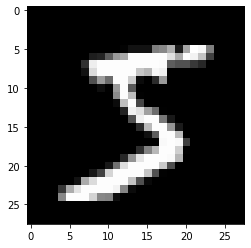

In [54]:
# Get first image of training set
x_first = x_train[0]
plt.imshow(x_first, cmap='gray')
plt.show()

In [43]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255 #the pixel intensities are represented as floats from 0.0 to 255.0 => so we divide by 255
x_test = x_test.astype("float32") / 255

In [ ]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1) #the new axis will be placed at index = -1 of the NEW shape
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
#number of samples in train and test set
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
# Get first image of training set
???

In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
#build a model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [ ]:
#train a model
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 41s 96ms/step - loss: 0.3624 - accuracy: 0.8905 - val_loss: 0.0806 - val_accuracy: 0.9790
Epoch 2/15
422/422 [==============================] - 40s 95ms/step - loss: 0.1121 - accuracy: 0.9663 - val_loss: 0.0562 - val_accuracy: 0.9842
Epoch 3/15
422/422 [==============================] - 41s 96ms/step - loss: 0.0854 - accuracy: 0.9726 - val_loss: 0.0445 - val_accuracy: 0.9877
Epoch 4/15
422/422 [==============================] - 40s 95ms/step - loss: 0.0710 - accuracy: 0.9777 - val_loss: 0.0433 - val_accuracy: 0.9877
Epoch 5/15
422/422 [==============================] - 40s 95ms/step - loss: 0.0631 - accuracy: 0.9804 - val_loss: 0.0390 - val_accuracy: 0.9888
Epoch 6/15
422/422 [==============================] - 40s 95ms/step - loss: 0.0564 - accuracy: 0.9828 - val_loss: 0.0368 - val_accuracy: 0.9895
Epoch 7/15
422/422 [==============================] - 40s 95ms/step - loss: 0.0523 - accuracy: 0.9834 - val_loss: 0.0350 - val_accuracy:

In [ ]:
#Evaluate the trained model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.022701293230056763
Test accuracy: 0.991100013256073


Check if we have the model is overfitting the training set??